# FRA_Project(Milestone-1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
import warnings
warnings.filterwarnings('ignore')


In [21]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)
data_dict=pd.read_excel('Data_Dictionary.xlsx')
data_dict

,#,Field Name,Description,New Field Name
0,1,Co_Code,Company Code,Co_Code
1,2,Co_Name,Company Name,Co_Name
2,3,Networth Next Year,Value of a company as on 2016 - Next Year(difference between the value of total assets and total liabilities),Networth_Next_Year
3,4,Equity Paid Up,Amount that has been received by the company through the issue of shares to the shareholders,Equity_Paid_Up
4,5,Networth,Value of a company as on 2015 - Current Year,Networth
5,6,Capital Employed,Total amount of capital used for the acquisition of profits by a company,Capital_Employed
6,7,Total Debt,The sum of money borrowed by the company and is due to be paid,Total_Debt
7,8,Gross Block,Total value of all of the assets that a company owns,Gross_Block
8,9,Net Working Capital,"The difference between a company's current assets (cash, accounts receivable, inventories of raw materials and finished goods) and its current liabilities (accounts payable).",Net_Working_Capital
9,10,Current Assets,All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year.,Curr_Assets


In [5]:
df=pd.read_excel('Company_Data2015-1.xlsx')

# Data Exploration

### Top 5 rows of data

In [56]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### To display all the columns

In [105]:
pd.options.display.max_columns= False

In [76]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


* Spacial characters in column names required to be removed.

In [6]:
df.columns=df.columns.str.replace('[','_')
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.replace(']','')
df.columns=df.columns.str.replace('.','')
df.columns=df.columns.str.replace('(','')
df.columns=df.columns.str.replace(')','')
df.columns=df.columns.str.replace('%','perc')
df.columns=df.columns.str.replace('-','_')
df.columns=df.columns.str.replace('/','_')

In [359]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


### Data Info

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_Liabilities_     

* Total 67 columns
* Total 3586 rows
* Data types for all columns are as per expectations
* Null values present in few columns

### Checking duplicate rows

In [325]:
df[df.duplicated()==True]

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets/Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block


* No duplicate columns are present

### Checking unique valued columns(IDs)

In [207]:
df.Co_Code.nunique()

3586

In [206]:
df.Co_Name.nunique()

3586

* Columns 'Co_Code' and 'Co_Name' are unique valued(IDs) columns. Dropping these for further analysis

In [7]:
df_new=df.copy()

In [8]:
df_new=df.drop(['Co_Code','Co_Name'],axis=1)
df_new.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


# 1.1 Outliers Treatment

#### Outliers Check

<AxesSubplot:>

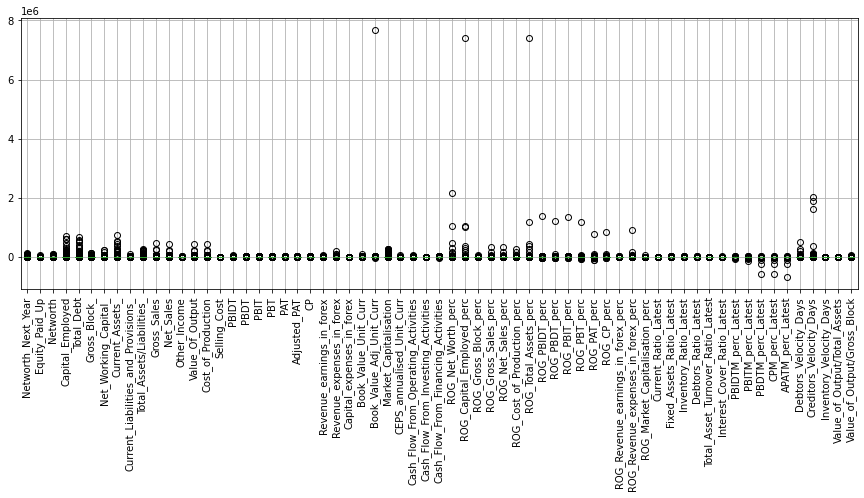

In [328]:
plt.figure(figsize=(15,5))
df_new.boxplot(rot=90)

#### Checking outliers for each column ,seperately 

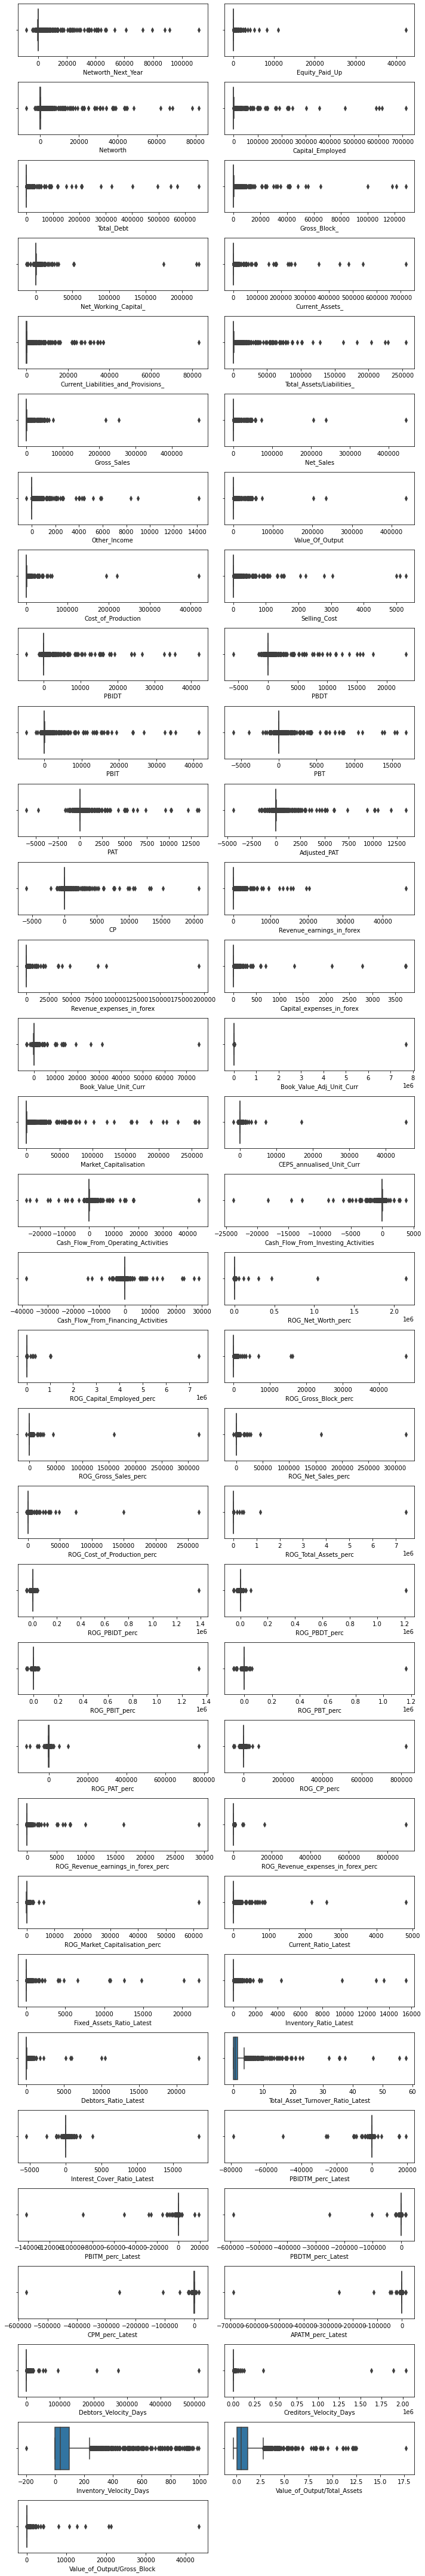

In [329]:
fig=plt.figure(figsize=(10,60))
for i in range(0,len(df_new.columns)):
    ax=fig.add_subplot(33,2,i+1)
    sns.boxplot(df_new[df_new.columns[i]])
    plt.tight_layout();

* There are outliers in all the columns


#### Treating Outliers 

In [363]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [367]:
for column in df_new.columns:
    lr,ur=remove_outlier(df[column])
    df_new[column]=np.where(df_new[column]>ur,ur,df_new[column])
    df_new[column]=np.where(df_new[column]<lr,lr,df_new[column])

<AxesSubplot:>

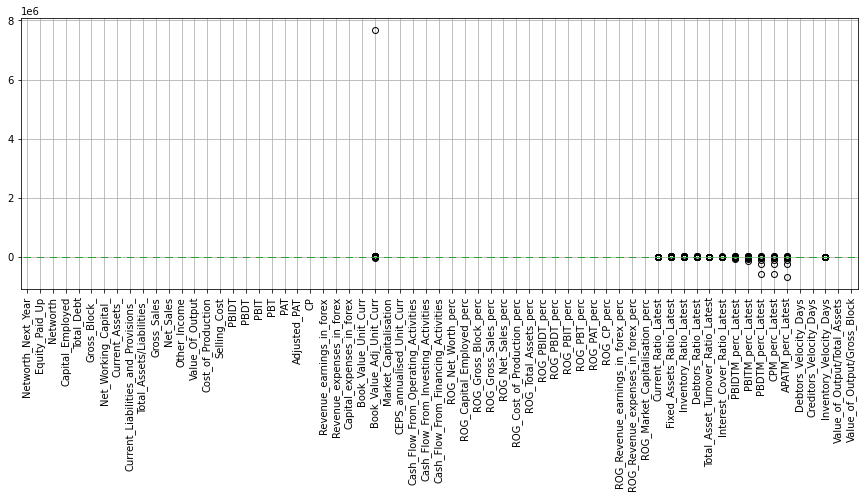

In [332]:
plt.figure(figsize=(15,5))
df_new.boxplot(rot=90)

# 1.2 Missing Value Treatment

### Columns-wise check

In [9]:
df1=pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
df2=df1[df1[0]>0]
df2

,0
Inventory_Velocity_Days,103
Book_Value_Adj_Unit_Curr,4
Interest_Cover_Ratio_Latest,1
PBITM_perc_Latest,1
Fixed_Assets_Ratio_Latest,1
Inventory_Ratio_Latest,1
Debtors_Ratio_Latest,1
Total_Asset_Turnover_Ratio_Latest,1
PBIDTM_perc_Latest,1
PBDTM_perc_Latest,1


* Most Null values present in the column; Inventory_Velocity_Days

### Rows-wise check

In [154]:
df.isnull().sum(axis=1).sort_values(ascending=False)

2825    11
393      1
277      1
598      1
3001     1
        ..
1213     0
1215     0
1216     0
1217     0
3585     0
Length: 3586, dtype: int64

In [334]:
df.loc[[2825],:]

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets/Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
2825,3240,G M Breweries,180.99,11.71,126.2,158.3,32.1,130.8,-7.65,39.86,47.51,205.81,1035.56,516.36,2.36,516.32,263.81,4.11,40.81,34.02,35.25,28.46,18.63,17.55,24.19,0.0,0.0,0.0,107.8,86.24,131.48,20.15,19.79,-12.71,-2.8,10.21,10.62,-4.88,6.07,6.41,8.8,-6.71,-5.12,-8.6,-8.27,-12.81,-13.51,-7.39,0.0,0.0,-11.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6,23.0,2.98,5.53


* Row 2825 has most number of null values

### Treating missing values

* Since all the columns having missing values have outliers also, so we will replace null values by there repective medians

In [10]:
from sklearn.impute import  SimpleImputer

In [11]:
imputer=SimpleImputer(missing_values=np.nan, strategy='median')

In [12]:
imr=imputer.fit(df_new)
df_new=pd.DataFrame(imr.transform(df_new),columns=df_new.columns)

In [13]:
df_new.isnull().sum().sum()

0

In [14]:
df_new1=df_new.copy()

# 1.3 Transform Target variable into 0 and 1
Dependent variable - We need to create a default variable that should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.

In [23]:
df_new['Default']=np.where((df_new['Networth_Next_Year']>0),0,1)

In [24]:
df_final=df_new.drop(['Networth_Next_Year'],axis=1)

In [25]:
df_final.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block,Default
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,45.0,0.00,0.00,1
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-39.74,-57.74,-57.74,-87.18,29.0,101.0,2.0,0.31,0.24,1
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5516.98,-7780.25,-7723.67,-7961.51,97.0,558.0,0.0,-0.03,-0.26,1
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-7.21,-48.13,-47.70,-51.58,93.0,63.0,2.0,0.24,1.90,1
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-400.55,-845.88,379.79,274.79,3887.0,346.0,0.0,0.01,0.05,1


# 1.4 Univariate & Bivariate analysis with interpretation. (only those variables which were significant in the model building)

* Most significant variables identified after the model building are;
   * Book_Value_Adj_Unit_Curr
   * Current_Ratio_Latest
   * Debtors_Ratio_Latest
   * Interest_Cover_Ratio_Latest
   * PBDTM_perc_Latest
* So, analysing these 

In [569]:
df_most_significants=df_new[['Book_Value_Adj_Unit_Curr','Current_Ratio_Latest','Debtors_Ratio_Latest','Interest_Cover_Ratio_Latest','PBDTM_perc_Latest']]

### Boxplots 

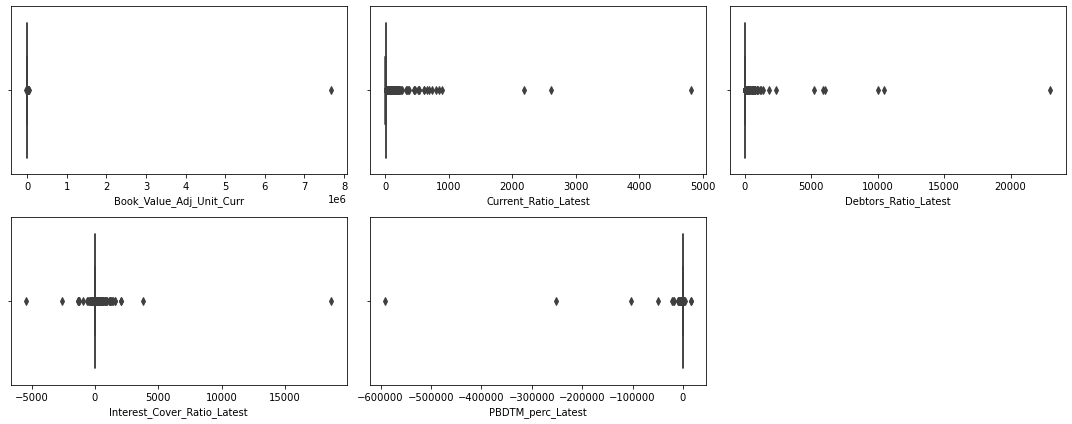

In [573]:
fig=plt.figure(figsize=(15,6))
for i in range(0,len(df_most_significants.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(df_most_significants[df_most_significants.columns[i]])
    plt.tight_layout();

### Distribution plots

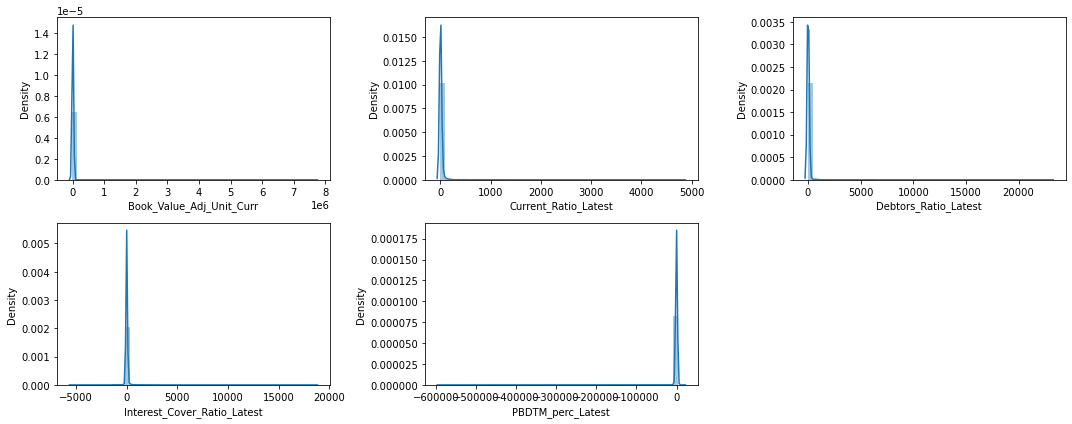

In [574]:
fig=plt.figure(figsize=(15,6))
for i in range(0,len(df_most_significants.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df_most_significants[df_most_significants.columns[i]])
    plt.tight_layout();

### Countplot for 'Default'

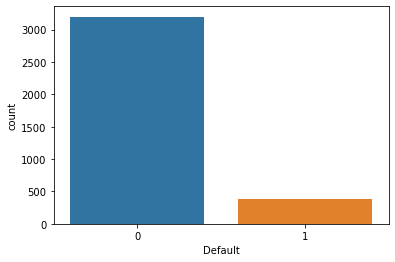

In [578]:
sns.countplot(data=df_final,x='Default');

### Plots most significant variables v/s "Default"

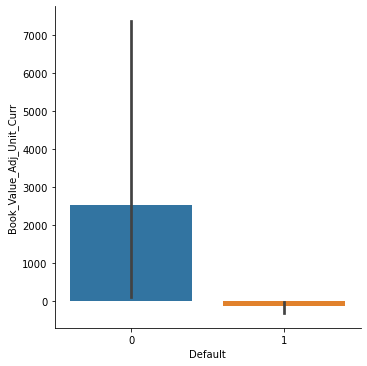

In [585]:
sns.catplot(data=df_final,x='Default',y='Book_Value_Adj_Unit_Curr',kind='bar');

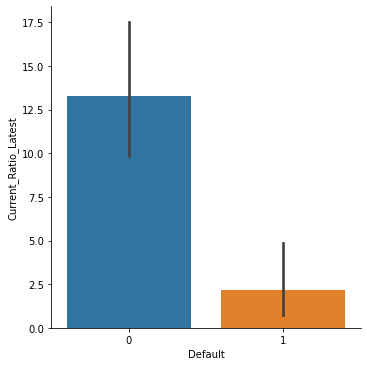

In [584]:
sns.catplot(data=df_final,x='Default',y='Current_Ratio_Latest',kind='bar');

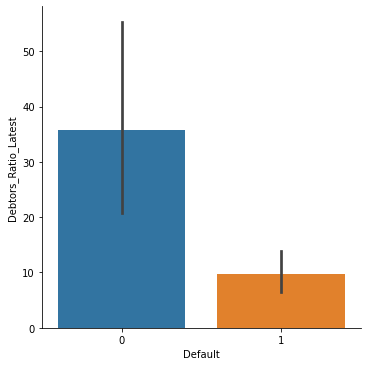

In [586]:
sns.catplot(data=df_final,x='Default',y='Debtors_Ratio_Latest',kind='bar');

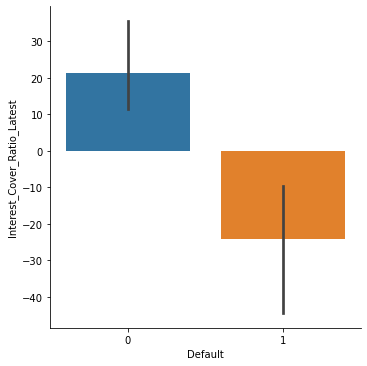

In [587]:
sns.catplot(data=df_final,x='Default',y='Interest_Cover_Ratio_Latest',kind='bar');

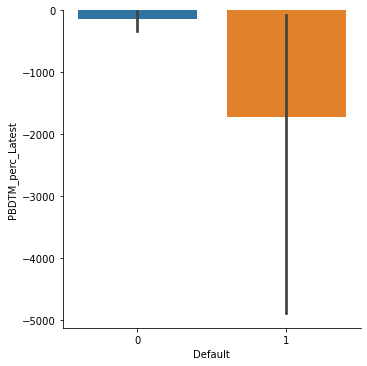

In [588]:
sns.catplot(data=df_final,x='Default',y='PBDTM_perc_Latest',kind='bar');

### Heatmap ( most significant variables and "default")

<AxesSubplot:>

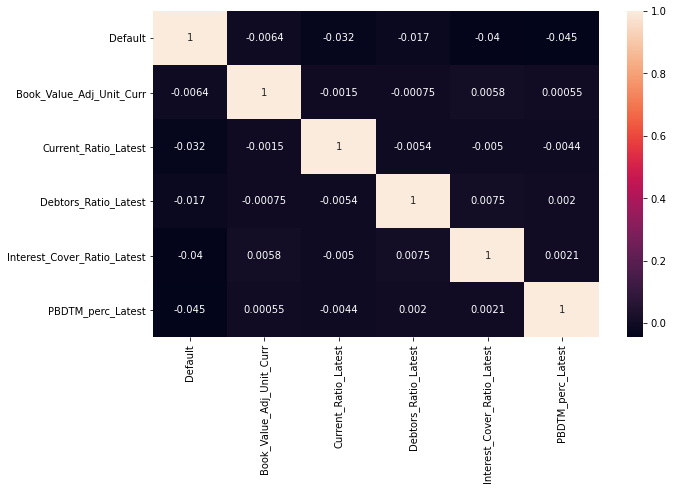

In [577]:
plt.figure(figsize=(10,6))
sns.heatmap(df_final[['Default','Book_Value_Adj_Unit_Curr','Current_Ratio_Latest','Debtors_Ratio_Latest','Interest_Cover_Ratio_Latest','PBDTM_perc_Latest']].corr(),annot=True)

### Interpretations from the graphs of most significant variables and 'Default' variable;
* Boxplot- All the variables are having outliers.
* Distribution plots- All the variables are concentrated at value zero.
* For 'Default' v/s ''Book_Value_Adj_Unit_Curr','Current_Ratio_Latest' and 'Debtors_Ratio_Latest', the non-defaulters are high as compared to defaulters.
*  For 'Default' v/s ''Book_Value_Adj_Unit_Curr' and 'PBDTM_perc_Latest', the relation is in negative direction.
* Heatmap- All the variables are showing no correlation among each other and with 'Default".

### Heatmap for complete dataset

<AxesSubplot:>

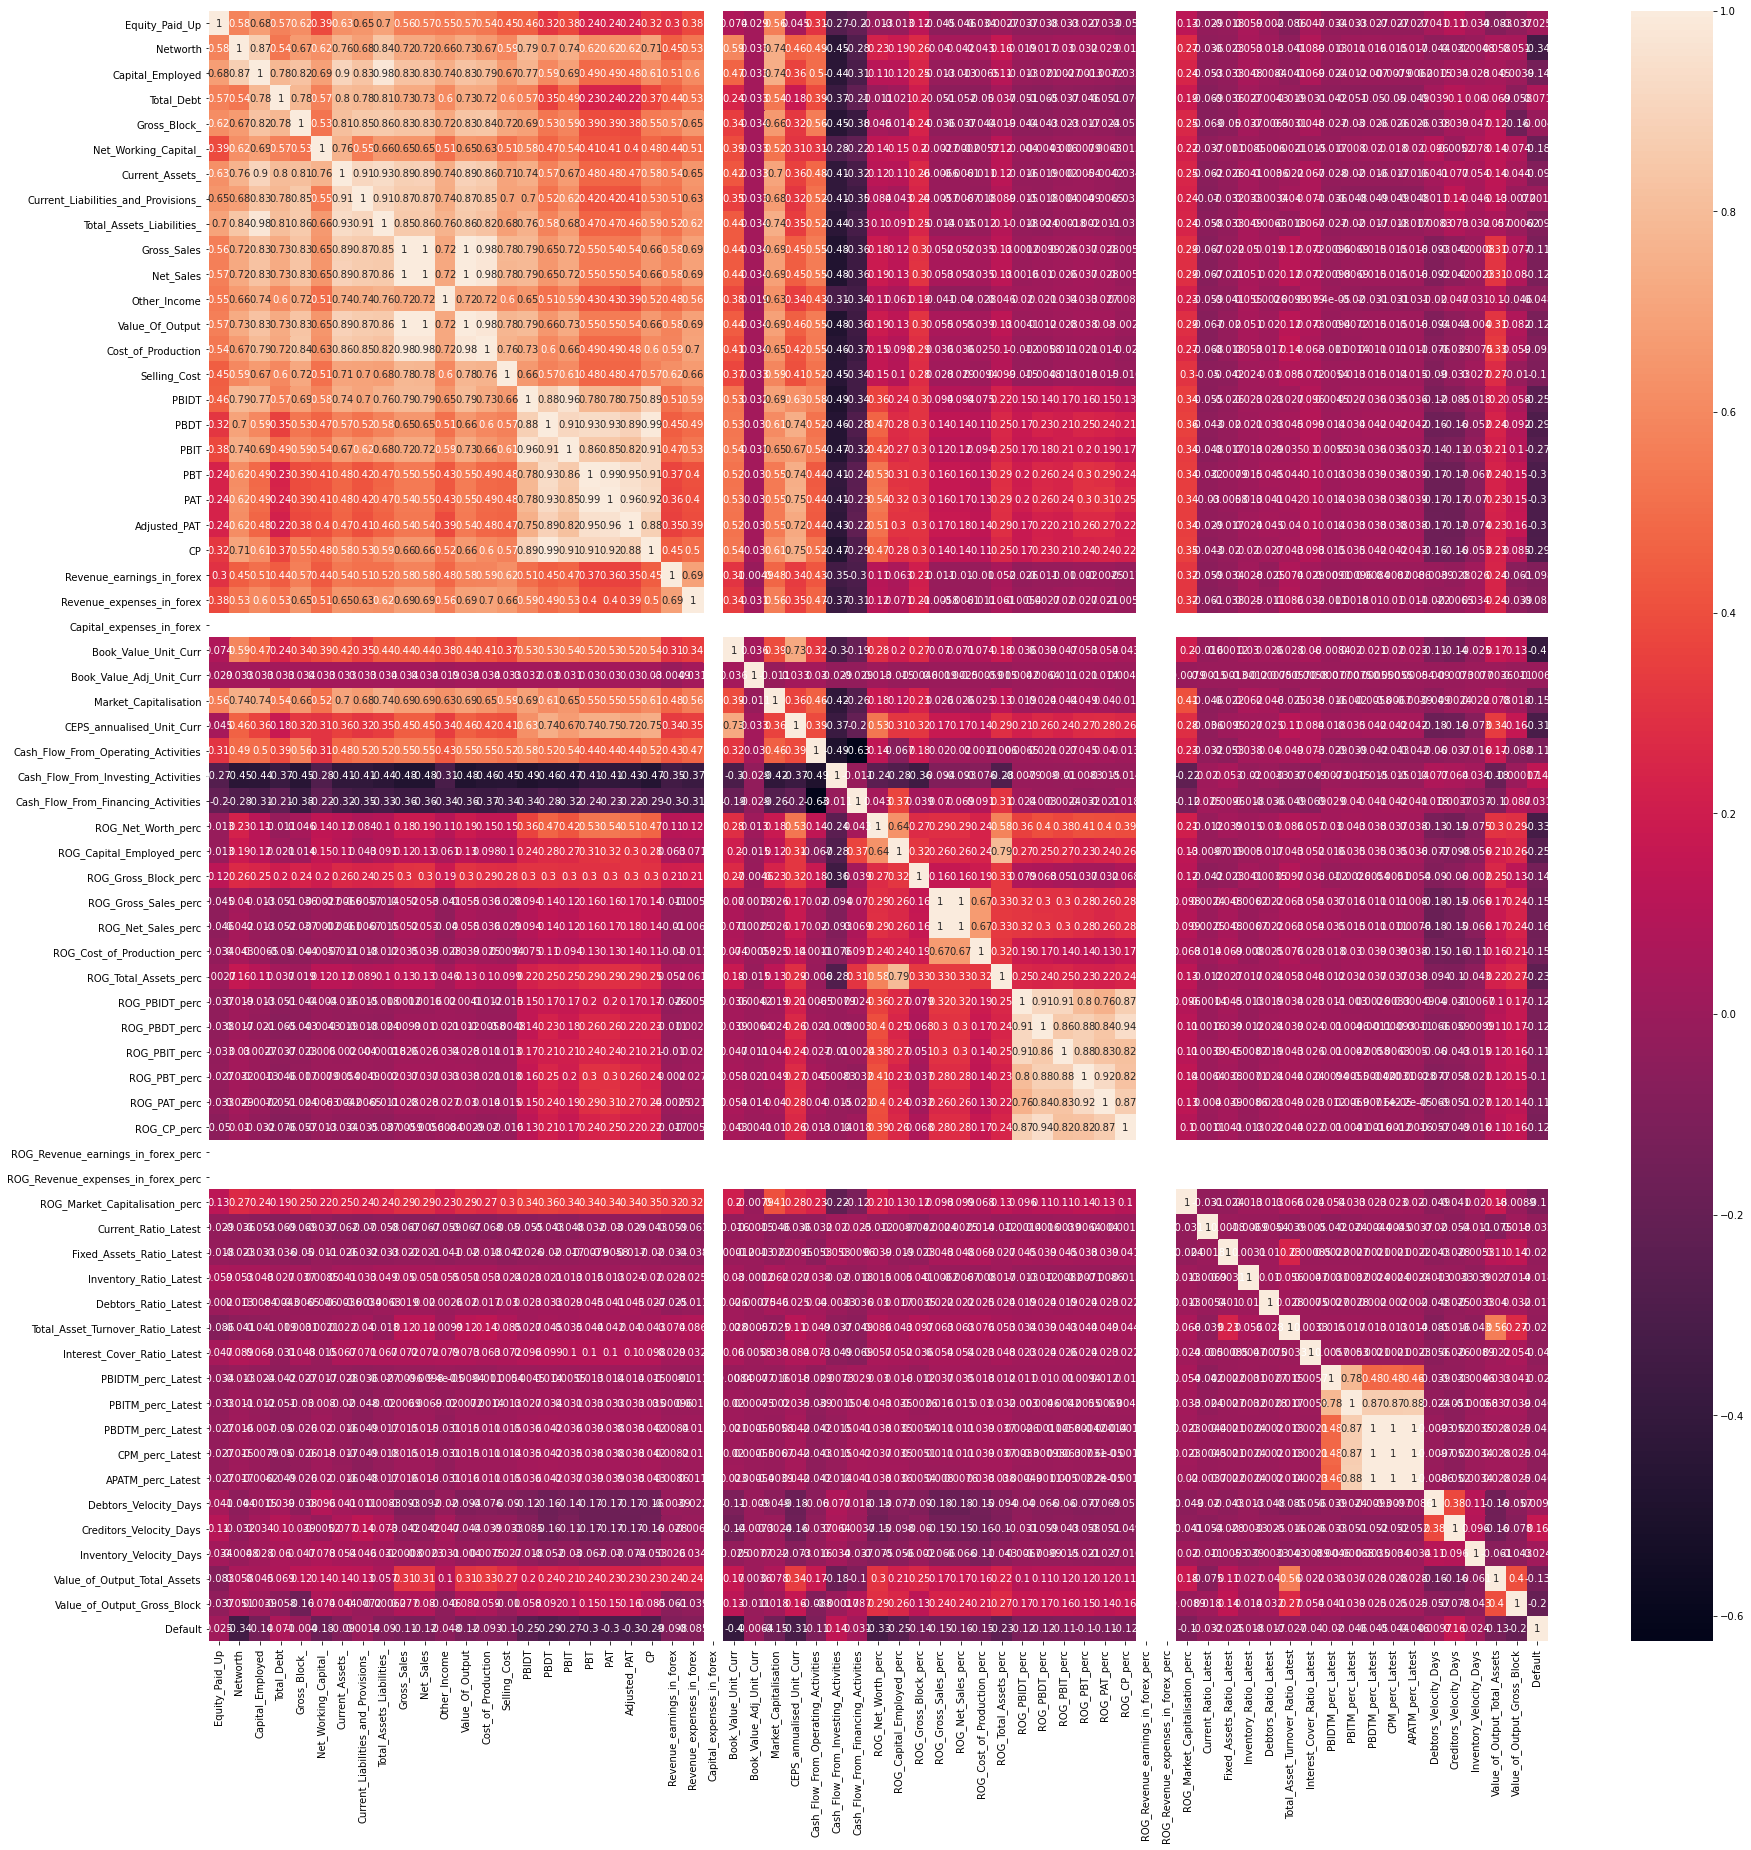

In [390]:
plt.figure(figsize=(30,30))
sns.heatmap(df_final.corr(),annot=True)

* There is a perfect correlation between following variables:
  * 'Gross_Sales',  'Net_Sales' and 'Value_Of_Output'
  *  'ROG_Gross_Sales_perc'and 'ROG_Net_Sales_perc'
  *  'PBDTM_perc_Latest','CPM_perc_Latest' and 'APATM_perc_Latest
  So, dropping the columns for further analysis ; 'Net_Sales', 'Value_Of_Output','ROG_Net_Sales_perc','CPM_perc_Latest' and 'APATM_perc_Latest

# 1.5 Train Test Split


* Since, there is a perfect correlation between following variables:
  
  * 'Gross_Sales',  'Net_Sales' and 'Value_Of_Output'
  *  'ROG_Gross_Sales_perc'and 'ROG_Net_Sales_perc'
  *  'PBDTM_perc_Latest','CPM_perc_Latest' and 'APATM_perc_Latest
  * 'ROG_Revenue_expenses_in_forex_perc', 
  * 'ROG_Revenue_earnings_in_forex_perc'
  * 'Capital_expenses_in_forex'
  
 * So, dropping the columns for further analysis ; 'Net_Sales', 'Value_Of_Output','ROG_Net_Sales_perc','CPM_perc_Latest' and 'APATM_perc_Latest

In [26]:
X=df_final.drop(['Default','Capital_expenses_in_forex','ROG_Revenue_earnings_in_forex_perc','ROG_Revenue_expenses_in_forex_perc','Net_Sales', 'Value_Of_Output','ROG_Net_Sales_perc','CPM_perc_Latest','APATM_perc_Latest'],axis=1)
y=df_final['Default']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [28]:
train_dataset=pd.concat([X_train,y_train],axis=1)
test_dataset=pd.concat([X_test,y_test],axis=1)

In [29]:
train_dataset.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,...,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block,Default
662,3.00,2.68,2.72,0.00,1.01,1.15,1.17,0.01,2.73,0.30,...,0.00,-32.00,-44.00,-32.00,304.0,0.0,3.0,0.10,0.23,0
1373,2.09,9.74,9.83,0.00,1.01,2.35,2.71,0.36,10.19,0.16,...,0.00,162.50,157.50,162.50,0.0,0.0,321.0,0.04,0.39,0
3268,25.70,769.96,2487.52,1709.53,488.77,1085.84,1451.89,366.06,2853.57,1516.95,...,0.22,8.26,5.91,-18.47,206.0,49.0,27.0,0.37,2.83,0
3246,35.03,573.78,1869.36,1291.35,1033.28,829.15,1222.24,393.09,2262.45,210.78,...,183.75,68.29,66.26,67.93,553.0,348.0,0.0,0.01,0.04,0
1456,2.50,8.27,15.14,6.87,7.54,8.80,9.67,0.88,16.02,59.13,...,3.81,5.16,3.81,4.16,0.0,2.0,56.0,3.25,5.92,0


In [30]:
test_dataset.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,...,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block,Default
3163,16.79,524.86,810.37,273.93,498.67,373.13,1392.61,1019.48,1829.85,4403.88,...,1.03,2.33,1.86,0.52,20.0,76.0,43.0,2.01,7.82,0
3133,85.54,356.19,810.63,443.35,1248.83,10.08,157.02,146.94,957.57,1672.83,...,5.27,12.65,7.21,11.29,19.0,2.0,11.0,1.91,1.72,0
937,5.19,4.39,4.39,0.00,0.04,4.39,4.43,0.04,4.43,0.48,...,0.00,0.00,0.00,0.00,0.0,0.0,35.0,0.00,0.00,0
196,3.81,-10.21,17.17,15.16,25.84,-4.07,7.94,12.00,29.17,17.72,...,0.03,3.97,0.33,-5.75,6.0,69.0,52.0,0.00,0.00,1
2852,25.88,194.12,271.36,53.59,283.77,85.21,122.50,37.29,308.65,287.02,...,1.65,8.10,3.75,5.82,57.0,35.0,88.0,1.44,1.50,0


# 1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

### Model1

In [31]:
f1='Default~Equity_Paid_Up + Networth + Capital_Employed + Total_Debt +Gross_Block_+ Net_Working_Capital_ + Current_Assets_+Current_Liabilities_and_Provisions_+Total_Assets_Liabilities_+Gross_Sales+ Other_Income+Cost_of_Production+ Selling_Cost+ PBIDT+ PBDT+PBIT+ PBT+PAT+Adjusted_PAT+CP+ Revenue_earnings_in_forex+Revenue_expenses_in_forex +Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+Market_Capitalisation +CEPS_annualised_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Gross_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIDT_perc+ROG_PBDT_perc+ROG_PBIT_perc+ROG_PBT_perc+ROG_PAT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+PBIDTM_perc_Latest+PBITM_perc_Latest+PBDTM_perc_Latest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_Total_Assets+Value_of_Output_Gross_Block'

In [ ]:
model_1=SM.logit(formula=f1,data=train_dataset).fit()

In [ ]:
model_1.summary()

#### Checking the Variance Inflation Factor

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
X = train_dataset
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('PBIDTM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('PBDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Total_Assets_Liabilities_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Gross_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('PBIDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Current_Assets_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_PBDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Capital_Employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('CP', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_PBIDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Cost_of_Production', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_PBT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Current_Liabilities_and_Provisions_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Networth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Gross_Block_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('PBIT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_PAT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('CEPS_annualised_Unit_Curr', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Market_Capitalisation', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Selling_Cost', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_Capital_Employed_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

### Model2

In [2]:
f2='Default~Equity_Paid_Up +Total_Debt + Net_Working_Capital_ + Other_Income +Adjusted_PAT+ Revenue_earnings_in_forex+Revenue_expenses_in_forex +Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Gross_Block_perc+ROG_Gross_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIDT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+PBIDTM_perc_Latest+PBITM_perc_Latest+PBDTM_perc_Latest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_Total_Assets+Value_of_Output_Gross_Block'

In [ ]:
model_2=SM.logit(formula=f2,data=train_dataset).fit()

In [ ]:
model_2.summary()

* Still there are many insignificant variables, so using VIF again.

In [ ]:
X = X.drop('Net_Working_Capital_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Value_of_Output_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

### Model3

In [487]:
f3='Default~Equity_Paid_Up +Total_Debt + Other_Income +Adjusted_PAT+ Revenue_earnings_in_forex+Revenue_expenses_in_forex +Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Gross_Block_perc+ROG_Gross_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIDT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+PBIDTM_perc_Latest+PBITM_perc_Latest+PBDTM_perc_Latest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_Gross_Block'

In [488]:
model_3=SM.logit(formula=f3,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.122161
         Iterations 20


model_3.summary()

* Still there are many insignificant variables, so using VIF again.

In [ ]:
X = X.drop('Revenue_earnings_in_forex', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Cash_Flow_From_Operating_Activities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Other_Income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_CP_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Total_Debt', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Adjusted_PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Equity_Paid_Up', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_Gross_Sales_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_Total_Assets_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Creditors_Velocity_Days', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Book_Value_Unit_Curr', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Revenue_expenses_in_forex', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Value_of_Output_Gross_Block', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

### Model4

In [503]:
X.columns

Index(['Book_Value_Adj_Unit_Curr', 'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Gross_Block_perc', 'ROG_Cost_of_Production_perc', 'ROG_PBIT_perc',
       'ROG_Market_Capitalisation_perc', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest',
       'Debtors_Velocity_Days', 'Inventory_Velocity_Days', 'Default'],
      dtype='object')

In [505]:
f4='Default~Book_Value_Adj_Unit_Curr+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_PBIDT_perc+ROG_Market_Capitalisation_perc+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+PBITM_perc_Latest+PBDTM_perc_Latest+Debtors_Velocity_Days+Inventory_Velocity_Days'

In [522]:
model_4=SM.logit(formula=f4,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.133170
         Iterations 18


In [523]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.5958
Time:                        19:38:46   Log-Likelihood:                -319.88
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.081e-188
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.3774      0.182     -2.078      0.038      -0.733      -0.021
Book_Value_Adj_Unit_Curr               -0.1234      0.011    -11.249      0.000      -0.145      -0.102
Cash_Flow_From_Investing_Activities    -0.0154      0.027     -0.580      0.562      -0.067       0.037
Cash_Flow_From_Financing_Activities     0.0198      0.018      1.070      0.285      -0.016       0.056
ROG_Net_Worth_perc                     -0.0317      0.008     -3.990      0.000      -0.047      -0.016
ROG_Gross_Block_perc                   -0.0119      0.017     -0.694      0.488      -0.045       0.022
ROG_Cost_of_Production_perc            -0.0042      0.003     -1.361      0.174      -0.010       0.002
ROG_PBIDT_perc                         -0.0021      0.001     -1.541      0.123      -0.005       0.001
ROG_Market_Capitalisation_perc         -0.0023      0.002     -1.006      0.314      -0.007       0.002
Current_Ratio_Latest                   -0.3458      0.073     -4.740      0.000      -0.489      -0.203
Fixed_Assets_Ratio_Latest              -0.0022      0.002     -0.924      0.355      -0.007       0.002
Inventory_Ratio_Latest                 -0.0009      0.001     -0.778      0.437      -0.003       0.001
Debtors_Ratio_Latest                   -0.0069      0.003     -2.169      0.030      -0.013      -0.001
Total_Asset_Turnover_Ratio_Latest       0.0157      0.034      0.463      0.644      -0.051       0.082
Interest_Cover_Ratio_Latest            -0.0015      0.001     -1.119      0.263      -0.004       0.001
PBITM_perc_Latest                   -4.932e-05      0.000     -0.455      0.649      -0.000       0.000
PBDTM_perc_Latest                   -5.657e-05   3.35e-05     -1.690      0.091      -0.000    9.02e-06
Debtors_Velocity_Days                  -0.0024      0.001     -2.008      0.045      -0.005   -5.66e-05
Inventory_Velocity_Days                 0.0010      0.001      1.413      0.158      -0.000       0.002
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Still there are many insignificant variables, so using VIF again.

In [ ]:
X = X.drop('PBITM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_Net_Worth_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_Gross_Block_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Debtors_Velocity_Days', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_Market_Capitalisation_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Total_Asset_Turnover_Ratio_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Inventory_Velocity_Days', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_Cost_of_Production_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Cash_Flow_From_Financing_Activities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ROG_PBIT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

### Model5

In [518]:
X.columns

Index(['Book_Value_Adj_Unit_Curr', 'Cash_Flow_From_Investing_Activities',
       'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest',
       'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBDTM_perc_Latest', 'Default'],
      dtype='object')

In [519]:
f5='Default~Book_Value_Adj_Unit_Curr+Cash_Flow_From_Investing_Activities+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Interest_Cover_Ratio_Latest+PBDTM_perc_Latest'

In [524]:
model_5=SM.logit(formula=f5,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.142144
         Iterations 17


In [525]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            8
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.5685
Time:                        19:39:14   Log-Likelihood:                -341.43
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.153e-189
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.3676      0.142     -2.591      0.010      -0.646      -0.090
Book_Value_Adj_Unit_Curr               -0.1343      0.011    -12.227      0.000      -0.156      -0.113
Cash_Flow_From_Investing_Activities    -0.0008      0.025     -0.033      0.973      -0.050       0.048
Current_Ratio_Latest                   -0.3958      0.077     -5.136      0.000      -0.547      -0.245
Fixed_Assets_Ratio_Latest              -0.0033      0.003     -1.108      0.268      -0.009       0.003
Inventory_Ratio_Latest                 -0.0009      0.001     -0.774      0.439      -0.003       0.001
Debtors_Ratio_Latest                   -0.0059      0.003     -1.893      0.058      -0.012       0.000
Interest_Cover_Ratio_Latest            -0.0020      0.001     -2.706      0.007      -0.003      -0.001
PBDTM_perc_Latest                   -7.101e-05   2.02e-05     -3.515      0.000      -0.000   -3.14e-05
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Dropping 'Cash_Flow_From_Investing_Activities'

### Model6

In [527]:
f6='Default~Book_Value_Adj_Unit_Curr+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Interest_Cover_Ratio_Latest+PBDTM_perc_Latest'

In [528]:
model_6=SM.logit(formula=f6,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.142144
         Iterations 17


In [529]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                            7
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.5685
Time:                        19:41:36   Log-Likelihood:                -341.43
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.234e-190
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.3673      0.141     -2.596      0.009      -0.645      -0.090
Book_Value_Adj_Unit_Curr       -0.1342      0.011    -12.539      0.000      -0.155      -0.113
Current_Ratio_Latest           -0.3959      0.077     -5.136      0.000      -0.547      -0.245
Fixed_Assets_Ratio_Latest      -0.0033      0.003     -1.109      0.268      -0.009       0.003
Inventory_Ratio_Latest         -0.0009      0.001     -0.778      0.436      -0.003       0.001
Debtors_Ratio_Latest           -0.0059      0.003     -1.893      0.058      -0.012       0.000
Interest_Cover_Ratio_Latest    -0.0020      0.001     -2.708      0.007      -0.003      -0.001
PBDTM_perc_Latest           -7.094e-05   2.01e-05     -3.534      0.000      -0.000   -3.16e-05
===============================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Dropping 'Inventory_Ratio_Latest'

### Model7

In [530]:
f7='Default~Book_Value_Adj_Unit_Curr+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Debtors_Ratio_Latest+Interest_Cover_Ratio_Latest+PBDTM_perc_Latest'

In [531]:
model_7=SM.logit(formula=f7,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.142364
         Iterations 17


In [532]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2395
Method:                           MLE   Df Model:                            6
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.5679
Time:                        19:43:48   Log-Likelihood:                -341.96
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.935e-191
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.3858      0.140     -2.759      0.006      -0.660      -0.112
Book_Value_Adj_Unit_Curr       -0.1340      0.011    -12.536      0.000      -0.155      -0.113
Current_Ratio_Latest           -0.3940      0.077     -5.128      0.000      -0.545      -0.243
Fixed_Assets_Ratio_Latest      -0.0034      0.003     -1.117      0.264      -0.009       0.003
Debtors_Ratio_Latest           -0.0060      0.003     -1.925      0.054      -0.012       0.000
Interest_Cover_Ratio_Latest    -0.0020      0.001     -2.713      0.007      -0.003      -0.001
PBDTM_perc_Latest           -7.091e-05      2e-05     -3.544      0.000      -0.000   -3.17e-05
===============================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Dropping 'Fixed_Assets_Ratio_Latest'

### Model8

In [533]:
f8='Default~Book_Value_Adj_Unit_Curr+Current_Ratio_Latest+Debtors_Ratio_Latest+Interest_Cover_Ratio_Latest+PBDTM_perc_Latest'

In [534]:
model_8=SM.logit(formula=f8,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.143088
         Iterations 17


In [535]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2396
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.5657
Time:                        19:45:35   Log-Likelihood:                -343.70
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.778e-191
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.4054      0.140     -2.901      0.004      -0.679      -0.132
Book_Value_Adj_Unit_Curr       -0.1354      0.011    -12.621      0.000      -0.156      -0.114
Current_Ratio_Latest           -0.4051      0.077     -5.230      0.000      -0.557      -0.253
Debtors_Ratio_Latest           -0.0062      0.003     -1.987      0.047      -0.012   -8.41e-05
Interest_Cover_Ratio_Latest    -0.0020      0.001     -2.805      0.005      -0.003      -0.001
PBDTM_perc_Latest           -7.193e-05   1.99e-05     -3.617      0.000      -0.000    -3.3e-05
===============================================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### All the variables are now having p value less than 0.05, so we may finalise this model i.e Model8

# 1.7 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

#### Validating on the train set

In [536]:
y_prob_pred_train = model_8.predict(train_dataset)

In [537]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

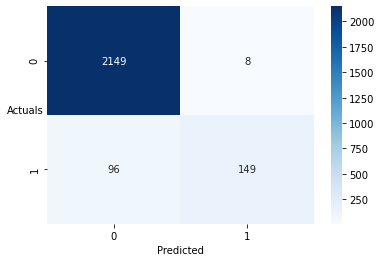

In [539]:
sns.heatmap((metrics.confusion_matrix(train_dataset['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [540]:
print(metrics.classification_report(train_dataset['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.957     0.996     0.976      2157
           1      0.949     0.608     0.741       245

    accuracy                          0.957      2402
   macro avg      0.953     0.802     0.859      2402
weighted avg      0.956     0.957     0.952      2402



* Choosing the optimal threshold

In [548]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_dataset['Default'],y_prob_pred_train)

In [549]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.21810285570994345

* Validating with revised threshold of 0.218

In [555]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.218:
        a=1
    else:
        a=0
    y_class_pred.append(a)

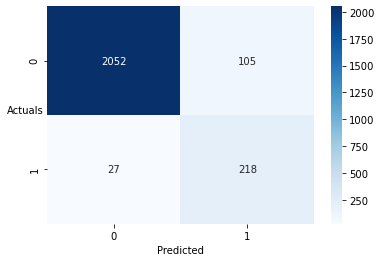

In [558]:
sns.heatmap((metrics.confusion_matrix(train_dataset['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [559]:
print(metrics.classification_report(train_dataset['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.987     0.951     0.969      2157
           1      0.675     0.890     0.768       245

    accuracy                          0.945      2402
   macro avg      0.831     0.921     0.868      2402
weighted avg      0.955     0.945     0.948      2402



#### Validating on the test set

In [560]:
y_prob_pred_test = model_8.predict(test_dataset)

In [561]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.218:
        a=1
    else:
        a=0
    y_class_pred.append(a)

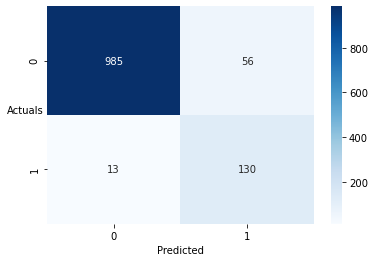

In [562]:
sns.heatmap((metrics.confusion_matrix(test_dataset['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [563]:
print(metrics.classification_report(test_dataset['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.987     0.946     0.966      1041
           1      0.699     0.909     0.790       143

    accuracy                          0.942      1184
   macro avg      0.843     0.928     0.878      1184
weighted avg      0.952     0.942     0.945      1184



### Interpretations;
* The Recall value for train test is 0.890 and for test set is 0.909
* The Precision value for train test is 0.675 and for test set is 0.699
* Most significant features in data set are;
   * Book_Value_Adj_Unit_Curr
   * Current_Ratio_Latest
   * Debtors_Ratio_Latest
   * Interest_Cover_Ratio_Latest
   * PBDTM_perc_Latest
* All the above variables are in a negative relationship with "Default" i.e an increment in these variables may negatively affect the "Default".
* The increment in above variables may increase the Credit Risk.
* the variable "Current_Ratio_Latest" is showing to have most negative affect and thus an in crease in this will increase the Risk most significantly. 	
